## Reconstruction parcimonieuse


In [1]:
using LinearAlgebra

On s'intéresse au problème

$$\hspace{5cm} (\mathcal{P})\quad \min_{x\in \mathbb{R}^n}f(x) = \frac{1}{2}\Vert H x-y \Vert_W^2+\lambda \Vert x \Vert_1 $$

avec $y\in \mathbb{R}^m$ une observation du signal à reconstruire, $H\in \mathcal{M}_{m,n}(\mathbb{R})$, $W\in \mathcal{M}_{m}(\mathbb{R})$ symétrique définie positive. La matrice $W$ introduit une pondération sur les composantes du résidu.

**Question 1 :** Justifier la convexité de la fonctionnelle et donner un sous-gradient.

Si besoin, le problème se réécrit :

$$\hspace{5cm} (\mathcal{P})\quad \min_{x\in \mathbb{R}^n}f(x) = \frac{1}{2} \langle H x-y, W(H x-y) \rangle+\lambda \Vert x \Vert_1 $$

La fonctionelle est différentiable donc le sous-différentiel est simplement $\{ \nabla f(x) \}$.

Et on a : $\nabla f(x) = H^TW \left(Hx-y\right) + \lambda\, \mathrm{sign}(x)$.

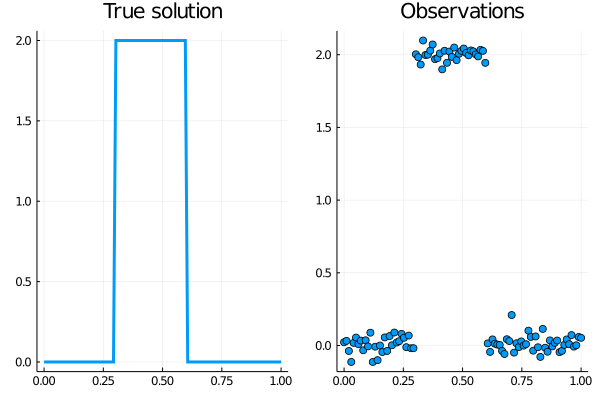

In [2]:
#Pkg.add("Plots")
using Plots

# Construction du problème #
############################

# solution à reconstruire 
##########################
dx=0.01;

n=Int(1/dx);#+1;
px=LinRange(0.,1.,n);
xt=zeros(n,1);

for i = 1:n
    if (px[i] > 0.3 && px[i]< 0.6)
        xt[i] = 2;         
    end
end


#observations
#############
nobs=1;
m=Int(floor(n/nobs));
var_obs=0.05;
sigmaW=ones(m,1)+2.0*rand(Float64,(m,1));

H=zeros(m,n);
py=zeros(m,1);
W=zeros(m,m);
for i=1:m
   H[i,(i-1)*nobs+1]=1;
   py[i]=px[(i-1)*nobs+1]; 
   W[i,i]=sigmaW[i];
end    
y=H*xt+var_obs*randn(Float64,(m,1));


p1=plot(px,xt,title="True solution",label=["xt"],lw=3);
p2=scatter(py,y,title="Observations",lw=3);
plot(p1,p2,layout=(1,2),legend=false)

**Question 2 :** Proposer le calcul de l'évaluation de f et d'un sous-gradient de f

In [3]:
# Fonction évaluant f en x
function evalf(x,y,H,W,lambda) 
    # Insérer votre code
    u = H*x-y
    return (1/2)*(transpose(u)*W*u)[1] + lambda*norm(x,1)
    # Fin insérer code
end

# Fonction évaluant un sous-gradient de f en x
function subgradf(x,y,H,W,lambda) 
    # Insérer votre code
    
    return transpose(H)*W*(H*x-y)+lambda*sign.(x)
    # Fin insérer code
end

subgradf (generic function with 1 method)

**Question 3 :** Résoudre le problème en utilisant un algorithme de sous-gradient. Vous implanterez les trois stratégies de pas vues en cours. Vous afficherez les courbes de convergence de $f_{best}^k$. 

**Question 4 :** Quelle influence a le paramètre $\lambda$ sur la convergence de l'algorithme et la qualité de la soltuion optimisée ?

In [4]:
#Pkg.add("Plots")
using Plots

#Initialisation
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_subgradient_simple =[];# Suite des itérés f_{best}^k

lambda=1e-2;

pas=1;
itermax_subgradient_simple=100;

xp=x;
while i < itermax_subgradient_simple
    i = i + 1;
    # Insérer votre code
    gk = subgradf(x,y,H,W,lambda) 
    
    if pas == 1
        xp -= 1e-2*gk
    elseif pas == 2
        xp -= 1/(100i) * gk
    elseif pas == 3
        xp -= 1/(norm(gk)*sqrt(i)) * gk
    end
    
    if evalf(xp,y,H,W,lambda) < fbest
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    # Fin insérer code
    
    # Stockage
    append!( histo_subgradient_simple, fbest)
end
#histo
#Affichage des courbes de convergence
plotly();

iter_subgradient_simple=1:itermax_subgradient_simple;
x=[xt,xbest];

p1 = plot(iter_subgradient_simple,histo_subgradient_simple,title="Convergence curve",label=["f"],lw=3,ann=[(55,80,"Sous-gradient simple")])
p2 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)
plot(p1,p2,layout=(1,2),legend=false)

┌ Info: For saving to png with the Plotly backend ORCA has to be installed.
└ @ Plots /home/hoellinger/.julia/packages/Plots/4EfKl/src/backends.jl:373


<!DOCTYPE html>
 
 
 Plots.jl

In [5]:
#Initialisation
x = 100*ones(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_subgradient_simple =[];# Suite des itérés f_{best}^k

lambda=1e-2;

pas=1;
itermax_subgradient_simple=100;

xp=x;
while i < itermax_subgradient_simple
    i = i + 1;
    # Insérer votre code
    gk = subgradf(x,y,H,W,lambda) 
    
    if pas == 1
        xp -= 1e-2*gk
    elseif pas == 2
        xp -= 1/(100i) * gk
    elseif pas == 3
        xp -= 1/(norm(gk)*sqrt(i)) * gk
    end
    
    if evalf(xp,y,H,W,lambda) < fbest
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    # Fin insérer code
    
    # Stockage
    append!( histo_subgradient_simple, fbest)
end
#histo
#Affichage des courbes de convergence
plotly();

iter_subgradient_simple=1:itermax_subgradient_simple;
x=[xt,xbest];

p7 = plot(iter_subgradient_simple,histo_subgradient_simple,title="Convergence curve",label=["f"],lw=3,ann=[(55,6*10^5,"Sous-gradient simple")])
p8 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

<!DOCTYPE html>
 
 
 Plots.jl

In [6]:
#Initialisation
x = ones(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_subgradient_simple =[];# Suite des itérés f_{best}^k

lambda=1e-2;

pas=1;
itermax_subgradient_simple=100;

xp=x;
while i < itermax_subgradient_simple
    i = i + 1;
    # Insérer votre code
    gk = subgradf(x,y,H,W,lambda) 
    
    if pas == 1
        xp -= 1e-2*gk
    elseif pas == 2
        xp -= 1/(100i) * gk
    elseif pas == 3
        xp -= 1/(norm(gk)*sqrt(i)) * gk
    end
    
    if evalf(xp,y,H,W,lambda) < fbest
        fbest = evalf(xp,y,H,W,lambda)
        xbest = xp
    end
    # Fin insérer code
    
    # Stockage
    append!( histo_subgradient_simple, fbest)
end
#histo
#Affichage des courbes de convergence
plotly();

iter_subgradient_simple=1:itermax_subgradient_simple;
x=[xt,xbest];

p13 = plot(iter_subgradient_simple,histo_subgradient_simple,title="Convergence curve",label=["f"],lw=3,ann=[(55,60,"Sous-gradient simple")])
p14 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

<!DOCTYPE html>
 
 
 Plots.jl

**Question 5 :** On pose $h(x)=\lambda \Vert x\Vert_1$ et $g(x)=\frac{1}{2}\Vert Hx-y\Vert_W^2$. Donner une expression analytique de la fonction proximale de h et implanter cette fonction. Implanter la fonction $g$ ainsi que son gradient.


$$
\forall x\in\mathbb{R}^n, \quad \mathrm{prox}_h = \underset{u\in\mathbb{R}^n}{\mathrm{argmin}}\left(h(u)+\Vert u-x \Vert_2^2\right)
$$

In [7]:
# Evaluation de prox_h
function proxh(x,lambda) 
# Insérer votre code
    proxh = similar(x)
    n = length(x)
    
    # On devrait trouver une manière de faire ça en vectoriel mais pour le moment ça ne fonctionne pas
    #proxh = zeros(n) + (x-1*lambda*ones(n))*(x.>lambda) + (x+lambda*ones(n))*(x.<lambda)
    
    # Version itérative:
    for i in 1:n
        if x[i]>lambda
            proxh[i] = x[i]-lambda
        elseif x[i]<lambda
            proxh[i] = x[i]+lambda
        else
            proxh[i] = 0
        end
    end
    
    return proxh
# Fin insérer code
end

#Evaluation de g
function evalg(x,y,H,W)
# Insérer votre code
    u = H*x-y
    (1/2)*(transpose(u)*W*u)[1]
# Fin insérer code
end    


#Evaluation du gradient de g
function gradg(x,y,H,W)
# Insérer votre code
    return transpose(H)*W*(H*x-y)
# Fin insérer code
end    

gradg (generic function with 1 method)

**Question 6 :** Résoudre le problème par la méthode du gradient proximal avec recherche linéaire pour le pas. Vous implanterez en prémabule la fonction de recherche linéaire.

In [8]:
# Fonction calculant le pas par recherche linéaire
# Insérer votre code
function search_step(alpha0,x,y,H,W,beta,lambda)
    alpha = alpha0
    gx = gradg(x,y,H,W)
    Gak = (1/alpha)*(x-proxh(x-alpha*gx,alpha*lambda))
    while evalg(x-alpha*Gak,y,H,W) > evalg(x,y,H,W)-alpha*(transpose(gx)*Gak)[1]+(alpha/2)*norm(Gak,2)^2
        alpha *= beta
        Gak = (1/alpha)*(x-proxh(x-alpha*gx,alpha*lambda))
    end
    return alpha
end
# Fin insérer code

search_step (generic function with 1 method)

In [9]:
#Initialisation
#x = 1000*ones(n,1);
x = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_grad_prox =[];# Suite des itérés f_{best}^k 

lambda0=1e-2;
itermax_grad_prox=10;
alpha0=1;
beta=0.5;

xp=x;
ap=alpha0;

while i < itermax_grad_prox
    i = i + 1;
    # Insérer votre code
    ap = search_step(ap,xp,y,H,W,beta,lambda0)
    xp = proxh(xp-ap*gradg(xp,y,H,W),ap*lambda0)
    
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    
    # Fin insérer code
    
    # Stockage
    append!( histo_grad_prox, fbest)
end
#histo_grad_prox
#Affichage des courbes de convergence
plotly();
iter_grad_prox=1:itermax_grad_prox;
x=[xt,xbest];

p3 = plot(iter_grad_prox,histo_grad_prox,title="Convergence curve",label=["f"],lw=3, ann=[(6,20,"Gradient proximal")])
p4 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)
plot(p3,p4,layout=(1,2),legend=false)

<!DOCTYPE html>
 
 
 Plots.jl

In [10]:
#Initialisation
x = 100*ones(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_grad_prox =[];# Suite des itérés f_{best}^k 

lambda0=1e-2;
itermax_grad_prox=10;
alpha0=1
beta=0.5;

xp=x;
ap=alpha0;

while i < itermax_grad_prox
    i = i + 1;
    # Insérer votre code
    ap = search_step(ap,xp,y,H,W,beta,lambda0)
    xp = proxh(xp-ap*gradg(xp,y,H,W),ap*lambda0)
    
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    
    # Fin insérer code
    
    # Stockage
    append!( histo_grad_prox, fbest)
end
#histo_grad_prox
#Affichage des courbes de convergence
plotly();
iter_grad_prox=1:itermax_grad_prox;
x=[xt,xbest];

p9 = plot(iter_grad_prox,histo_grad_prox,title="Convergence curve",label=["f"],lw=3, ann=[(6,1.5*10^5,"Gradient proximal")])
p10 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

<!DOCTYPE html>
 
 
 Plots.jl

In [11]:
#Initialisation
x = ones(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_grad_prox =[];# Suite des itérés f_{best}^k 

lambda0=1e-2;
itermax_grad_prox=10;
alpha0=1
beta=0.5;

xp=x;
ap=alpha0;

while i < itermax_grad_prox
    i = i + 1;
    # Insérer votre code
    ap = search_step(ap,xp,y,H,W,beta,lambda0)
    xp = proxh(xp-ap*gradg(xp,y,H,W),ap*lambda0)
    
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    
    # Fin insérer code
    
    # Stockage
    append!( histo_grad_prox, fbest)
end
#histo_grad_prox
#Affichage des courbes de convergence
plotly();
iter_grad_prox=1:itermax_grad_prox;
x=[xt,xbest];

p15 = plot(iter_grad_prox,histo_grad_prox,title="Convergence curve",label=["f"],lw=3, ann=[(6,15,"Gradient proximal")])
p16 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

<!DOCTYPE html>
 
 
 Plots.jl

**Question 7 :** Evaluez la sensisibilité de l'algorithme aux différents paramètres : $\lambda_0$, $\beta$, itermax.  

In [12]:
#Initialisation
#x = 1000*ones(n,1);
x = zeros(n,1);
z = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_FISTA =[];# Suite des itérés f_{best}^k 

lambda0=1e-2;
itermax_FISTA=10;
alpha0=1
beta=0.5;

xp=x;
zp=z;
ap=alpha0;

while i < itermax_FISTA
    i = i + 1;
    # Insérer votre code
    ap = search_step(ap,zp,y,H,W,beta,lambda0)
    xprev = xp
    xp = proxh(zp-ap*gradg(zp,y,H,W),ap*lambda0)
    zp = xp + ((i-1)/(i+2))*(xp-xprev)
    
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    
    # Fin insérer code
    
    # Stockage
    append!( histo_FISTA, fbest)
end
#histo_FISTA
#Affichage des courbes de convergence
plotly();
iter_FISTA=1:itermax_FISTA;
x=[xt,xbest];

p5 = plot(iter_FISTA,histo_FISTA,title="Convergence curve",label=["f"],lw=3,ann=[(6,20,"FISTA")])
p6 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

plot(p5,p6,layout=(1,2),legend=false)

<!DOCTYPE html>
 
 
 Plots.jl

In [13]:
#Initialisation
#x = 100*ones(n,1);
x = zeros(n,1);
z = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_FISTA =[];# Suite des itérés f_{best}^k 

lambda0=1e-2;
itermax_FISTA=10;
alpha0=1
beta=0.5;

xp=x;
zp=z;
ap=alpha0;

while i < itermax_FISTA
    i = i + 1;
    # Insérer votre code
    ap = search_step(ap,zp,y,H,W,beta,lambda0)
    xprev = xp
    xp = proxh(zp-ap*gradg(zp,y,H,W),ap*lambda0)
    zp = xp + ((i-1)/(i+2))*(xp-xprev)
    
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    
    # Fin insérer code
    
    # Stockage
    append!( histo_FISTA, fbest)
end
#histo_FISTA
#Affichage des courbes de convergence
plotly();
iter_FISTA=1:itermax_FISTA;
x=[xt,xbest];

p11 = plot(iter_FISTA,histo_FISTA,title="Convergence curve",label=["f"],lw=3,ann=[(6,20,"FISTA")])
p12 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

<!DOCTYPE html>
 
 
 Plots.jl

In [14]:
#Initialisation
#x = ones(n,1);
x = zeros(n,1);
z = zeros(n,1);
xbest=x;
i = 0;
fbest =1000000; # $f_{best}^0$
histo_FISTA =[];# Suite des itérés f_{best}^k 

lambda0=1e-2;
itermax_FISTA=10;
alpha0=1
beta=0.5;

xp=x;
zp=z;
ap=alpha0;

while i < itermax_FISTA
    i = i + 1;
    # Insérer votre code
    ap = search_step(ap,zp,y,H,W,beta,lambda0)
    xprev = xp
    xp = proxh(zp-ap*gradg(zp,y,H,W),ap*lambda0)
    zp = xp + ((i-1)/(i+2))*(xp-xprev)
    
    if evalf(xp,y,H,W,lambda0) < fbest
        fbest = evalf(xp,y,H,W,lambda0)
        xbest = xp
    end
    
    # Fin insérer code
    
    # Stockage
    append!( histo_FISTA, fbest)
end
#histo_FISTA
#Affichage des courbes de convergence
plotly();
iter_FISTA=1:itermax_FISTA;
x=[xt,xbest];

p17 = plot(iter_FISTA,histo_FISTA,title="Convergence curve",label=["f"],lw=3,ann=[(6,20,"FISTA")])
p18 = plot(px,x,title="Reconstruction",label=["True solution" "Optimized solution"],lw=3)

<!DOCTYPE html>
 
 
 Plots.jl

## $\lambda=10^{-2}$, $\alpha_0=1$, $\beta=0.5$, x = `zeros(n,1)`, z = `zeros(n,1)`

In [15]:
plot(p1,p2,p3,p4,p5,p6,layout=(3,2),legend=false)

<!DOCTYPE html>
 
 
 Plots.jl

## $\lambda=10^{-2}$, $\alpha_0=1$, $\beta=0.5$, x = `ones(n,1)`, z = `zeros(n,1)`

In [16]:
plot(p13,p14,p15,p16,p17,p18,layout=(3,2),legend=false,title="")

<!DOCTYPE html>
 
 
 Plots.jl

## $\lambda=10^{-2}$, $\alpha_0=1$, $\beta=0.5$, x = `100*ones(n,1)`, z = `zeros(n,1)`

In [17]:
plot(p7,p8,p9,p10,p11,p12,layout=(3,2),legend=false,title="")

<!DOCTYPE html>
 
 
 Plots.jl